Checkpoint#2 Instructions:

Submit a google colab/ jupyter notebook file (.ipynb) on Gradescope with:
● (5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c)
organize (e.g., set up a database or a pandas DataFrame).
● (20 points) Basic data exploration and summary statistics
○ You must present three conclusions using at least three different statistical
methods including hypothesis testing.
■ For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.
○ For each method, you must have at least one gorgeous plot.


(1a) Importing Dataset (raw)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('high_diamond_ranked_10min.csv')
print(df)

          gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5      

(1b) Parsing the data

---




In [44]:
df['blueWins'] = df['blueWins'].replace({0: 'No', 1: 'Yes'})

Our data is already in numerical format so there is no need to convert our data to integers. Converting the 0 and 1 to No and Yes are for readibility in 2b.

(1c) Orgnanizing the Data

---



We choose to keep the data formatted in the same way as the CSV file because each column is essential to accurately represent different aspects of League of Legends. We want to preserve the structure of the original dataset in order to have relevant information avialible.





(2a) General Information/Statistics/Conclusions

---

The main characteristics of the dataset we have chosen are game outcomes, player statistics (gold, vision score, creep score), and general resource statistics (team objectives scored), for the two teams (red and blue) of each sample game of League of Legends.

There are 40 features and 9,879 entries.

Here are some basic statistics that can be gather using the data from the dataset (mean, std, etc). Some of the ones that we will most likely focus on are gameoutcome, kills, wards placed, and gold difference, and experience difference. There is a total of 9879 data points in this dataset.

The gold per minute feature encompasses many other features, such as total minions killed, kill count, CS per minute, objectives killed, and assists, as each action and feature in the game contribute to the overall gold per minute feature. However, each feature is an important aspect of the game that should be represented. Another key feature is starting map side (red or blue), as the map has changes to terrain and POV for the player, which can impact playstyle.

As League of Legends is broadly a resource gathering game (of the in-game currency, gold), gaining more gold generally leads to resource advantages that could allow the team with more gold to win the game. As elite monsters, dragons, and heralds provide buffs to the players, generally, teams with more objectives such as these can also gain an advantage (whether it be gold or a buff) that could help them win the game. Total minions killed, kill count, CS per minute, objectives killed, assists, and first kill counts also influence the gold per minute, as killing minions, champions, and objectives all grant the player gold in the game. Total minions killed and objectives killed also influences CS (creep score) per minute, as minions and objectives killed contribute to a player’s overall creep score.

Because gold, experience, and starting map side (red or blue) are such integral parts of the game, we will study if getting a resource advantage early through first blood (first kill of the game that provides extra gold compared to normal kills), having a gold or experience advantage, or starting on certain sides have an impact on winrate.

Map side and first bloods only have two options and a lot of data, so using a z-test (for a large population) or chi-squared (for two categorical variables) would be reasonable.

Another way to analzye if map side can affect performance is with a box and whisker plot, to check for outliers. For kills, using a histogram can help determine the trend across teams. As for experience and gold advantage, a scatterplot is helpful to visualize the data and identify the general trend as there is a lot of data.

In [36]:
print(df.describe())

             gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000 

Correlation in our Data

> As League of Legends is broadly a resource gathering game (of the in-game currency, gold), gaining more gold generally leads to resource advantages that could allow the team with more gold to win the game. As elite monsters, dragons, and heralds provide buffs to the players, generally, teams with more objectives such as these can also gain an advantage (whether it be gold or a buff) that could help them win the game. Total minions killed, kill count, CS per minute, objectives killed, assists, and first kill counts also influence the gold per minute, as killing minions, champions, and objectives all grant the player gold in the game. Total minions killed and objectives killed also influences CS (creep score) per minute, as minions and objectives killed contribute to a player’s overall creep score.



---



Below, we are running a function to see if there is any correlation between each of the columns. This test calculates the pairwise correlation coefficients between all numerical columns in our dataset/dataframe.

In [37]:
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


Analysis: Looking at these correlations that range from [-1,1], the highest positive correlation for blueWins is blueGoldDiff

In [38]:
import pandas as pd
import numpy as np

correlation_matrix = df.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)

specific_column = 'blueWins'
highest_positive_corr = correlation_matrix[specific_column].max()
column_with_highest_corr = correlation_matrix[specific_column].idxmax()

print("The highest positive correlation for column '{}' is {:.2f} with column '{}'.".format(specific_column, highest_positive_corr, column_with_highest_corr))


The highest positive correlation for column 'blueWins' is 0.51 with column 'blueGoldDiff'.


Below is a box and whisker plot which gives some outliers regarding blue kills and deaths in the first 10 min of a game. The outliters for both graphs are the same (as both Q1 and Q3 are the same), meaning that both players on blue will on average get a similiar amount of kills and deaths.

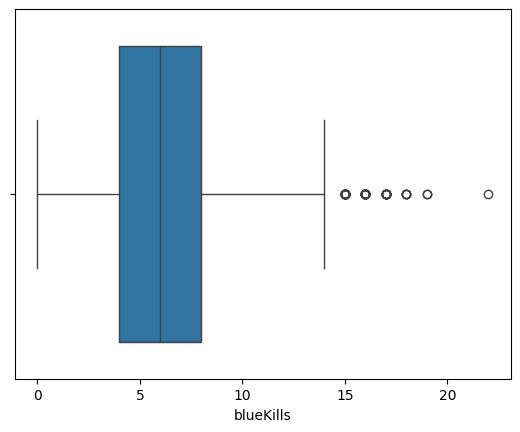

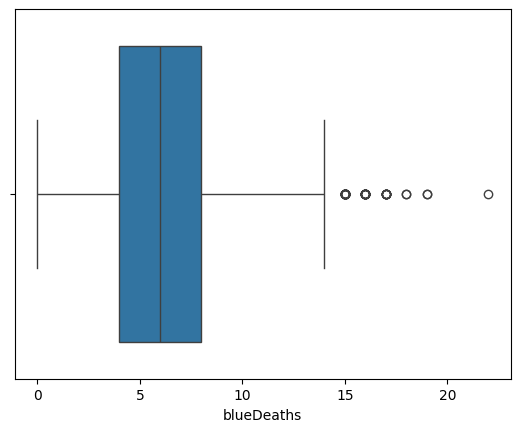

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['blueKills'])
plt.show()
sns.boxplot(x=df['blueDeaths'])
plt.show()

Below are two histrograms that show the distrubtion for each teams kills.

---



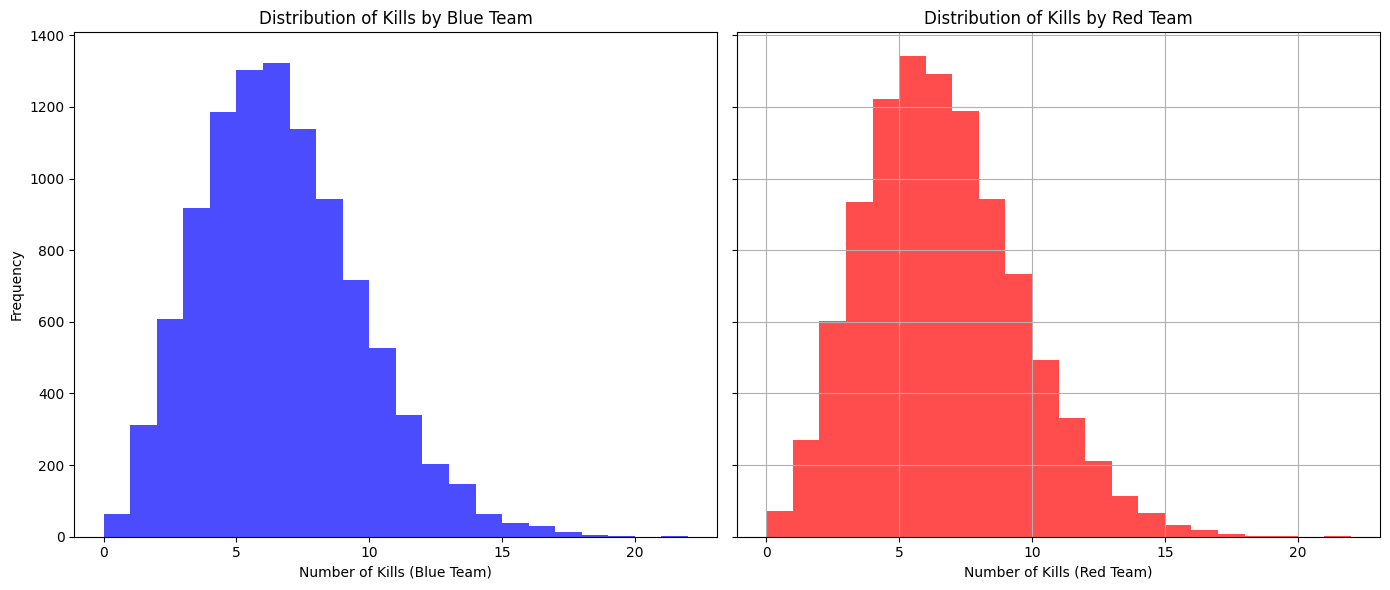

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Blue Histogram
ax[0].hist(df['blueKills'], bins=range(df['blueKills'].min(), df['blueKills'].max() + 1), color='blue', alpha=0.7)
ax[0].set_xlabel('Number of Kills (Blue Team)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Kills by Blue Team')

# Red Histogram
ax[1].hist(df['redKills'], bins=range(df['redKills'].min(), df['redKills'].max() + 1), color='red', alpha=0.7)
ax[1].set_xlabel('Number of Kills (Red Team)')
ax[1].set_title('Distribution of Kills by Red Team')

plt.grid(True)
plt.tight_layout()
plt.show()

Another relationship that is important to mention is Gold Difference versus Experience Difference. In a game like League of Legends, teams build an advantage by killing minions, battling for objectives (jungle monsters), or killing enemy players, all of which grant gold and experience. As shown in the scatterplot below, there is a correlation between Gold Difference and Experience Difference.

<Figure size 800x600 with 0 Axes>

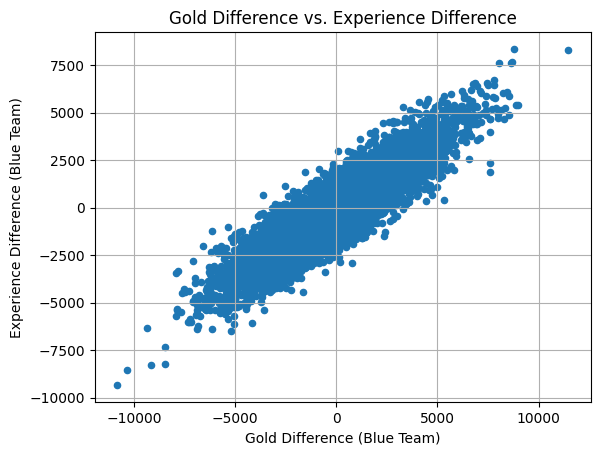

In [41]:
plt.figure(figsize=(8, 6))
df.plot.scatter("blueGoldDiff", "blueExperienceDiff")
plt.title('Gold Difference vs. Experience Difference')
plt.xlabel('Gold Difference (Blue Team)')
plt.ylabel('Experience Difference (Blue Team)')
plt.grid(True)
plt.show()


**Additional Information:**

---



Is a feature over-represented?
> The gold per minute feature encompasses many other features, such as total minions killed, kill count, CS per minute, objectives killed, and assists, as each action and feature in the game contribute to the overall gold per minute feature. However, each feature is an important aspect of the game that should be represented.


Are there outliers?

> There are always outliers, as all players differ in skill level, so different statistics may change due to how efficient they are in gathering resources. Some players may also decide to purposely perform poorly, which also creates outliers.






(2b) Hypothesis Testing

Test # 1: Does being on blue side influence winrate of the game?
> Null Hypothesis (H0): The proportion of wins for the blue side is equal to the proportion of wins for the red side.
> Alternative Hypothesis (H1): The proportion of wins for the blue side is greater than the proportion of wins for the red side.

In [46]:
wins = df['blueWins'].value_counts()
wins

blueWins
No     4949
Yes    4930
Name: count, dtype: int64

Let's graph the number of blue wins compared to red wins.

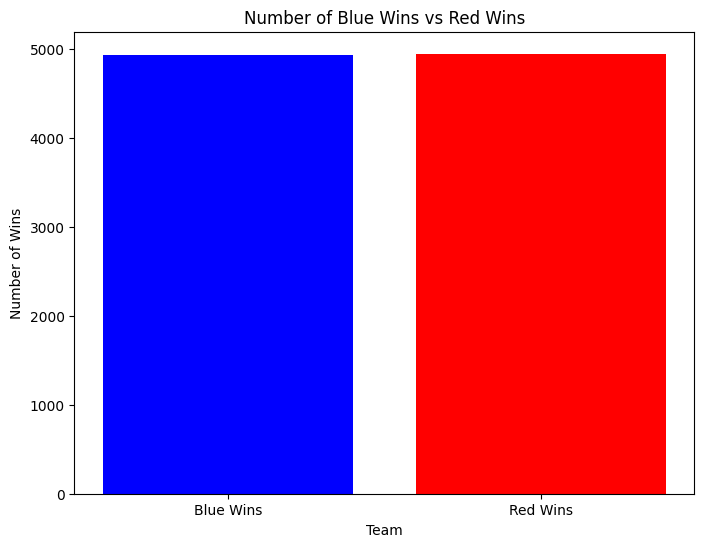

In [53]:
blue_wins = df['blueWins']
blue_win_count = blue_wins.sum()
red_win_count = len(blue_wins) - blue_win_count

# Create labels and counts for the plot
labels = ['Blue Wins', 'Red Wins']
counts = [blue_win_count, red_win_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Number of Blue Wins vs Red Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

Just by looking at the data, we can see that there isn't too much of a difference. In fact, the common myth in the community that blue side wins more often might not actually be true. Let's perform a z-test to see if the findings are actually statistically significant.

> We first find the proportion of times that blue wins.

In [54]:
from statsmodels.stats.proportion import proportions_ztest
# Calculate the proportion of wins for the blue side
blue_wins = df['blueWins']
proportion_blue_wins = blue_wins.mean()
print(proportion_blue_wins)

0.4990383642069035


Next, lets find the sample size and the expected proportion for our hypothesis.

>Assuming null hypothesis: Proportion of blue wins is equal to proportion of red wins

>Expected proportion under null hypothesis (if blue and red wins are equal) (.5)

In [49]:
# Calculate the sample size
sample_size = len(blue_wins)

expected_proportion = 0.5

Then, we can finally perform the Z-test!

In [55]:
# Perform Z-test
z_statistic, p_value = proportions_ztest(proportion_blue_wins * sample_size, sample_size, expected_proportion)

# Set significance level
alpha = 0.05

Finally, compare the p-value to the alpha to see if we can reject the null hypothesis.

In [56]:
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest that the blue side wins more games.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there's a difference in win rates between the blue and red sides.")

Fail to reject the null hypothesis. There is not enough evidence to conclude that there's a difference in win rates between the blue and red sides.


As we see above, we fail to reject the null hypothesis. It shows that there isn't enough evidence to conclude that there's a difference in win rate between the blue and red sides. The results imply that there is not enough evidence to conclude that the blue side wins more games than the red side, and that whichever side you play on has an influence on if you'll win the game.

(2c) Hypothesis Testing

>Null Hypothesis (H0): A team getting the first blood does not have an effect of the likelihood of a win.

>Alternate Hypothesis (H1): A team getting the first blood has an effect on the likelihood of a win.

In [68]:
contingency_table = pd.crosstab(df['blueFirstBlood'], df['blueWins'])
print(contingency_table)

blueWins           0     1
blueFirstBlood            
0               2949  1943
1               2000  2987


Here, we can display the proportion of wins relative to whether the first blood (first kill of the game, which grants 100 more gold than a normal kill) is acquired or not.

<Axes: title={'center': 'Proportion of Wins vs Losses with 0 First Bloods vs 1 First Blood'}, xlabel='Number of First Bloods', ylabel='Number of Games'>

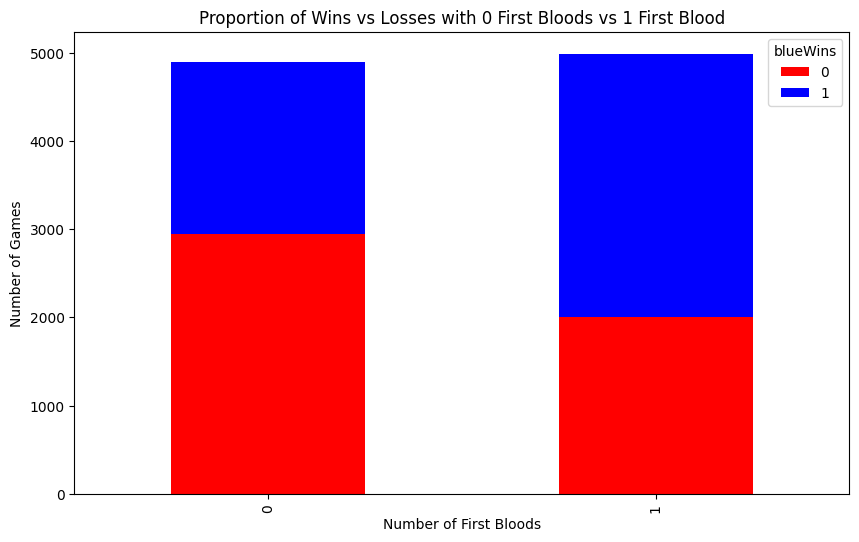

In [66]:
plt = df.groupby(['blueFirstBlood', 'blueWins']).size().unstack(fill_value=0)
colors = ["blue" if i != 0 else "red" for i in plt]
plt.plot(kind='bar', stacked=True, figsize=(10, 6), title = 'Proportion of Wins vs Losses with 0 First Bloods vs 1 First Blood', xlabel = 'Number of First Bloods', ylabel = 'Number of Games', color = colors)

As seen above, teams that get the first blood have a higher proportion of wins compared to teams that don't get the first blood.

Now, we can run the chi-square test with a significance level of 0.05.

In [69]:
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Statistic:", chi2_stat)
print("P-value:", p_val)

Chi-Squared Statistic: 401.3756384137523
P-value: 2.7636098571500442e-89


We are able to reject the null hypothesis because the obtained p-value is less than our significance level of 0.05.